<a href="https://colab.research.google.com/github/abdulrahmanalaa123/Graduation_Project/blob/Honda/grad_presentaion_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import pandas as pd
from re import L
import json
from operator import itemgetter
from google.colab import files
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import models   # for model loading
from sklearn.model_selection import GridSearchCV    
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from statsmodels.tsa.stattools import adfuller
#%pip install pandas==1.4.1       unpickle problem
from google.colab import drive
drive.mount('/content/drive')

with open("/content/drive/MyDrive/Colab Notebooks/hr(tuples).pkl", "rb") as f: 
    data = pickle.load(f) 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data)

      Participant           Stage       0:0.0  0:0.099791  0:0.199582  \
0              22        STIMULUS   (87, 602)   (87, 602)   (87, 602)   
1              22  QUESTIONNAIRES   (85, 921)   (85, 921)   (85, 921)   
2              22         WASHOUT   (80, 749)   (80, 792)   (80, 792)   
3              22        STIMULUS   (81, 719)   (81, 719)   (81, 719)   
4              22  QUESTIONNAIRES   (83, 702)   (82, 702)   (83, 702)   
...           ...             ...         ...         ...         ...   
1339           64        STIMULUS   (78, 516)   (78, 516)   (78, 516)   
1340           64  QUESTIONNAIRES   (77, 799)   (77, 799)   (77, 816)   
1341           64         WASHOUT    (0, 987)    (0, 987)    (0, 987)   
1342           64        STIMULUS   (69, 829)   (68, 829)   (69, 829)   
1343           64  QUESTIONNAIRES  (66, 1245)  (65, 1245)  (65, 1245)   

     0:0.299373  0:0.399164 0:0.49895500000000004  0:0.598746  \
0     (87, 602)   (87, 602)             (87, 602)   (87, 6

In [ ]:
print(data.isnull().sum().sum())
data.applymap(lambda x:getter(x)).head()

0


,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,SURPRISE,ANGER,ENTHUSIASM,LIKING,FEAR,AMUSEMENT,SADNESS,VALENCE,AROUSAL,MOTIVATION
0,22,STIMULUS,87,87,87,87,87,87,87,87,...,1,1,2,1,1,2,1,5,2,4
1,22,QUESTIONNAIRES,85,85,85,85,85,85,85,85,...,1,1,2,1,1,2,1,5,2,4
2,22,WASHOUT,80,80,80,80,80,80,79,79,...,1,1,1,1,1,1,1,4,2,5
3,22,STIMULUS,81,81,81,81,81,81,81,81,...,1,1,1,1,1,1,1,4,2,5
4,22,QUESTIONNAIRES,83,82,83,83,83,82,82,82,...,1,1,1,1,1,1,1,4,2,5


In [ ]:
def getter(x):
    if isinstance(x,tuple):
        return itemgetter(0)(x)
    else:
        return x

#data = pd.read_pickle("hr(tuples).pkl")
mask = data["Participant"] ==  22
mask2 = data["Stage"] == "STIMULUS"
mask1 = data["Stage"] == "WASHOUT"
mask3 = data["Target"]!= "BASELINE"
#print(data.loc[ mask2,[*data.columns[2:500],*data.columns[-15:]]].applymap(lambda x:getter(x)))
#print(data.loc[mask2,[*data.columns[2:6292]]].applymap(lambda x:getter(x)))#xtrain->particpants hr values
#print(data.loc[mask2,"Target"])#ytrain-> target emo

print(data.loc[mask2 , "Participant"].unique())
print(data.loc[mask2 , "Target"].unique())
part=data.loc[mask2 , "Participant"].unique()
target=data.loc[mask2 , "Target"].unique()
target=target[1:]
print(target)

[22 23 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
['BASELINE' 'NEUTRAL' 'AWE' 'DISGUST' 'SURPRISE' 'ANGER' 'ENTHUSIASM'
 'LIKING' 'FEAR' 'AMUSEMENT' 'SADNESS']
['NEUTRAL' 'AWE' 'DISGUST' 'SURPRISE' 'ANGER' 'ENTHUSIASM' 'LIKING' 'FEAR'
 'AMUSEMENT' 'SADNESS']


In [ ]:
print(data.loc[mask2].shape)
data.loc[mask2].shape

(462, 6305)


(462, 6305)

In [ ]:
def splittuple(dat):
  return dat.applymap(lambda x:getter(x))
hrdat = splittuple(data)
part=data.loc[mask2 , "Participant"].unique()
target=data.loc[mask2 , "Target"].unique()
target=target[1:]


In [ ]:
hrdat.loc[mask2].shape

(462, 6305)

In [ ]:
dict_all = {}
maskstage1 = data["Stage"] =="STIMULUS"
maskstage2 = data["Stage"] =="WASHOUT"
maststage3 = data["Stage"] =="QUESTIONNAIRES"
for e in target:
  rowlist=[]
  for p in part:
   masktar= hrdat["Target"]==e
   maskpart= hrdat["Participant"]==p
   
   a=(hrdat.loc[maskstage1&maskpart&masktar,hrdat.columns[2:6292]].values) #stim mean
   b=(hrdat.loc[maskstage2&maskpart&masktar,hrdat.columns[2:6292]].values) #wash mean
   c=(hrdat.loc[maststage3&maskpart&masktar,hrdat.columns[2:6292]].values) #ques mean
   
   x = np.array(a, dtype='float')
   y = np.array(b, dtype='float')
   z = np.array(c, dtype='float')
 
   x = x[x>0]
   y = y[y>0]
   z=  z[z>0]
   
   x=np.mean(x)
   y=np.mean(y)
   z=np.mean(z)

   cell=[int(x),int(y),int(z)]
   rowlist.append(cell)
  dict_all[e]=rowlist 
dict_all  


{'NEUTRAL': [[81, 82, 80],
  [78, 82, 77],
  [72, 79, 71],
  [69, 66, 66],
  [76, 76, 75],
  [108, 106, 106],
  [76, 74, 72],
  [57, 62, 56],
  [74, 73, 77],
  [79, 80, 78],
  [81, 80, 77],
  [79, 81, 78],
  [86, 85, 83],
  [70, 71, 74],
  [90, 86, 91],
  [90, 87, 87],
  [70, 68, 68],
  [66, 68, 63],
  [75, 68, 68],
  [77, 76, 77],
  [71, 70, 69],
  [64, 66, 69],
  [78, 80, 76],
  [82, 86, 79],
  [83, 86, 81],
  [76, 75, 74],
  [110, 108, 105],
  [78, 81, 74],
  [86, 88, 84],
  [92, 95, 94],
  [68, 71, 64],
  [81, 79, 78],
  [85, 87, 85],
  [69, 73, 68],
  [73, 70, 74],
  [96, 96, 93],
  [84, 82, 85],
  [92, 88, 93],
  [88, 83, 85],
  [89, 93, 89],
  [74, 73, 70],
  [74, 77, 76]],
 'AWE': [[81, 78, 79],
  [87, 89, 89],
  [75, 76, 74],
  [66, 69, 65],
  [73, 80, 72],
  [107, 109, 103],
  [72, 77, 76],
  [56, 59, 58],
  [75, 78, 73],
  [82, 79, 82],
  [81, 82, 81],
  [82, 81, 82],
  [85, 88, 84],
  [72, 69, 71],
  [88, 87, 88],
  [87, 86, 86],
  [68, 68, 66],
  [66, 69, 66],
  [85, 74, 7

In [ ]:
df=pd.DataFrame(dict_all)
df.set_index(part)

,NEUTRAL,AWE,DISGUST,SURPRISE,ANGER,ENTHUSIASM,LIKING,FEAR,AMUSEMENT,SADNESS
22,"[81, 82, 80]","[81, 78, 79]","[82, 82, 80]","[75, 78, 78]","[77, 78, 79]","[80, 84, 77]","[79, 79, 77]","[77, 80, 75]","[75, 75, 73]","[74, 78, 75]"
23,"[78, 82, 77]","[87, 89, 89]","[84, 88, 88]","[84, 87, 87]","[82, 84, 82]","[83, 86, 86]","[80, 85, 84]","[79, 87, 84]","[78, 82, 79]","[78, 82, 80]"
24,"[72, 79, 71]","[75, 76, 74]","[78, 78, 79]","[79, 82, 77]","[75, 79, 76]","[78, 81, 80]","[74, 77, 77]","[75, 77, 75]","[74, 76, 74]","[75, 78, 74]"
25,"[69, 66, 66]","[66, 69, 65]","[57, 64, 57]","[65, 68, 64]","[63, 67, 61]","[64, 66, 64]","[62, 67, 65]","[64, 63, 60]","[63, 68, 63]","[64, 67, 61]"
26,"[76, 76, 75]","[73, 80, 72]","[76, 78, 62]","[76, 77, 73]","[79, 79, 70]","[72, 77, 73]","[72, 77, 74]","[77, 80, 76]","[70, 79, 70]","[78, 74, 71]"
27,"[108, 106, 106]","[107, 109, 103]","[103, 104, 108]","[102, 107, 106]","[103, 104, 99]","[108, 110, 107]","[107, 106, 105]","[105, 107, 105]","[107, 106, 108]","[106, 108, 107]"
28,"[76, 74, 72]","[72, 77, 76]","[78, 78, 73]","[77, 74, 78]","[78, 77, 76]","[78, 74, 83]","[73, 74, 74]","[76, 78, 75]","[77, 77, 79]","[75, 80, 75]"
29,"[57, 62, 56]","[56, 59, 58]","[58, 58, 61]","[60, 57, 58]","[62, 56, 55]","[59, 55, 60]","[57, 59, 55]","[60, 56, 59]","[57, 58, 58]","[58, 59, 58]"
31,"[74, 73, 77]","[75, 78, 73]","[73, 76, 69]","[80, 75, 79]","[73, 73, 69]","[78, 75, 77]","[79, 81, 76]","[82, 79, 80]","[76, 80, 70]","[73, 75, 73]"
32,"[79, 80, 78]","[82, 79, 82]","[79, 80, 73]","[84, 78, 78]","[77, 78, 77]","[80, 77, 76]","[77, 78, 79]","[80, 81, 73]","[73, 78, 71]","[79, 79, 81]"


In [ ]:
from zmq import NULL
def splittuple(dat):
  return dat.applymap(lambda x:getter(x))
hrdat = splittuple(data)
def perform_adf_test (series):
  result=adfuller(series)
 # print('ADF Statistic : %f' % result[0])
 # print('P-Value : %f' % result[1])
  return(result)
def station(data,stage,func):
  part=data.loc[mask2 , "Participant"].unique()
  target=data.loc[mask2 , "Target"].unique()

  dict_all = {}
  non=[]
  stat=[]
  maskstage1 = data["Stage"] ==stage
  for e in target:
    rowlist=[]
    for p in part:
      masktar= data["Target"]==e
      maskpart= data["Participant"]==p
      
      a=(data.loc[maskstage1&maskpart&masktar,data.columns[2:6292]].values) #stim mean
      #a = a[~a.values.isnull()]
      x = np.array(a, dtype='float')
      if stage=="STIMULUS":
        x = x[x!=0]
      else:
        x = x[~x.values.isnull()]         
        #x = x[np.logical_not(np.isnan(x))]
      #print(x)
      if func=="adf":
        result=perform_adf_test(x)
        if result[1]<0.5:
          output="Stationary"
          stat.append([p,e])
        else:
          output="Not_Stationary"
          non.append([p,e])

        cell=[len(x),output]
      else:  
        split=int(len(x)/3)
        split1,split2,split3=x[0:split], x[split:(split*2)], x[(split*2):(split*3)]    
        if func=="mean":
          m1,m2,m3=split1.mean(),split2.mean(),split3.mean()
        else:
          m1,m2,m3=split1.var(),split2.var(),split3.var()
        cell=[int(m1),int(m2),int(m3)]
      rowlist.append(cell)
    dict_all[e]=rowlist 
  print(non)  
  return [dict_all,stat,non]  
stat_stim=station(hrdat,"STIMULUS","adf")         #function works only on stimulus at the moment 


[[27, 'BASELINE'], [22, 'NEUTRAL'], [24, 'NEUTRAL'], [27, 'NEUTRAL'], [36, 'NEUTRAL'], [37, 'NEUTRAL'], [44, 'NEUTRAL'], [48, 'NEUTRAL'], [53, 'NEUTRAL'], [55, 'NEUTRAL'], [63, 'NEUTRAL'], [22, 'AWE'], [25, 'AWE'], [27, 'AWE'], [39, 'AWE'], [40, 'AWE'], [41, 'AWE'], [44, 'AWE'], [57, 'AWE'], [63, 'AWE'], [22, 'DISGUST'], [23, 'DISGUST'], [24, 'DISGUST'], [26, 'DISGUST'], [27, 'DISGUST'], [31, 'DISGUST'], [32, 'DISGUST'], [33, 'DISGUST'], [34, 'DISGUST'], [37, 'DISGUST'], [38, 'DISGUST'], [39, 'DISGUST'], [40, 'DISGUST'], [42, 'DISGUST'], [43, 'DISGUST'], [45, 'DISGUST'], [46, 'DISGUST'], [47, 'DISGUST'], [48, 'DISGUST'], [49, 'DISGUST'], [53, 'DISGUST'], [54, 'DISGUST'], [57, 'DISGUST'], [58, 'DISGUST'], [61, 'DISGUST'], [64, 'DISGUST'], [23, 'SURPRISE'], [27, 'SURPRISE'], [28, 'SURPRISE'], [32, 'SURPRISE'], [34, 'SURPRISE'], [35, 'SURPRISE'], [38, 'SURPRISE'], [39, 'SURPRISE'], [42, 'SURPRISE'], [46, 'SURPRISE'], [47, 'SURPRISE'], [49, 'SURPRISE'], [50, 'SURPRISE'], [52, 'SURPRISE'], 

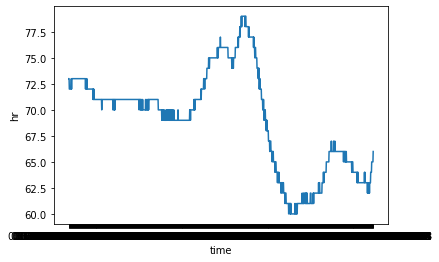

[73 73 72 ... 65 65 66]


In [ ]:
maskstage1 = data["Stage"] =="STIMULUS"
masktar= data["Target"]=="NEUTRAL"
maskpart= data["Participant"]==25
x=hrdat.columns[2:1224]
y=hrdat.loc[maskstage1&maskpart&masktar,hrdat.columns[2:1224]].values
plt.plot(x,y[0])
plt.xlabel('time')
plt.ylabel('hr')
plt.show()
#print(x)
print(y[0])

In [ ]:
df=pd.DataFrame(stat_stim[0])
df.set_index(part)

,BASELINE,NEUTRAL,AWE,DISGUST,SURPRISE,ANGER,ENTHUSIASM,LIKING,FEAR,AMUSEMENT,SADNESS
22,"[3141, Stationary]","[1222, Not_Stationary]","[1172, Not_Stationary]","[692, Not_Stationary]","[501, Stationary]","[1203, Stationary]","[1202, Stationary]","[1122, Stationary]","[1213, Stationary]","[1202, Stationary]","[1202, Stationary]"
23,"[3188, Stationary]","[1222, Stationary]","[1172, Stationary]","[692, Not_Stationary]","[501, Not_Stationary]","[1213, Stationary]","[1203, Stationary]","[1122, Not_Stationary]","[1223, Stationary]","[1202, Stationary]","[1203, Not_Stationary]"
24,"[3188, Stationary]","[1223, Not_Stationary]","[1172, Stationary]","[691, Not_Stationary]","[501, Stationary]","[1213, Stationary]","[1193, Stationary]","[1122, Stationary]","[1213, Not_Stationary]","[1213, Stationary]","[1203, Stationary]"
25,"[3187, Stationary]","[1222, Stationary]","[1173, Not_Stationary]","[702, Stationary]","[501, Stationary]","[1202, Stationary]","[1203, Stationary]","[1123, Stationary]","[1213, Stationary]","[1213, Stationary]","[1193, Stationary]"
26,"[3187, Stationary]","[1233, Stationary]","[1172, Stationary]","[691, Not_Stationary]","[491, Stationary]","[1212, Not_Stationary]","[1203, Stationary]","[1132, Stationary]","[1222, Stationary]","[1212, Stationary]","[1203, Stationary]"
27,"[3187, Not_Stationary]","[1233, Not_Stationary]","[1173, Not_Stationary]","[692, Not_Stationary]","[501, Not_Stationary]","[1203, Not_Stationary]","[1203, Stationary]","[1123, Not_Stationary]","[1213, Stationary]","[1202, Not_Stationary]","[1203, Not_Stationary]"
28,"[3187, Stationary]","[1223, Stationary]","[1173, Stationary]","[692, Stationary]","[491, Not_Stationary]","[1213, Not_Stationary]","[1203, Not_Stationary]","[1123, Stationary]","[1213, Stationary]","[1212, Stationary]","[1193, Stationary]"
29,"[3187, Stationary]","[1222, Stationary]","[1183, Stationary]","[692, Stationary]","[501, Stationary]","[1213, Not_Stationary]","[1203, Stationary]","[1122, Stationary]","[1213, Not_Stationary]","[1213, Stationary]","[1202, Stationary]"
31,"[3187, Stationary]","[1223, Stationary]","[1173, Stationary]","[691, Not_Stationary]","[501, Stationary]","[1203, Not_Stationary]","[1202, Stationary]","[1122, Stationary]","[1222, Stationary]","[1212, Not_Stationary]","[1193, Not_Stationary]"
32,"[3187, Stationary]","[1222, Stationary]","[1172, Stationary]","[691, Not_Stationary]","[501, Not_Stationary]","[1213, Stationary]","[1212, Stationary]","[1122, Stationary]","[1213, Stationary]","[1213, Stationary]","[1193, Not_Stationary]"


In [ ]:
xtrain=data.loc[mask2,[*data.columns[2:6292]]].applymap(lambda x:getter(x))
ytrain=data.loc[mask2,"Target"]


AttributeError: ignored

In [ ]:
x_train=[]
y_train=[]
label_encoder = LabelEncoder()
x_train,y_train=np.array(xtrain),np.array(ytrain)
y_train = label_encoder.fit_transform(y_train)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, train_size = 0.7, random_state = 123)
x_train,x_test=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)),np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#print(label_encoder_name_mapping)
print(x_train)

NameError: ignored

In [ ]:
#initalizing the RNN
regressor =tf.keras.Sequential()
#adding the first lstm layer and some dropout regularisation
regressor.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(tf.keras.layers.Dropout(0.2))
#adding the 2nd lstm layer and some dropout regularisation
regressor.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(tf.keras.layers.Flatten())

#adding the output layer
regressor.add (tf.keras.layers.Dense(units=11,activation='softmax'))
#compiling the RNN
regressor.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
print(regressor.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6290, 50)          10400     
                                                                 
 dropout_2 (Dropout)         (None, 6290, 50)          0         
                                                                 
 lstm_3 (LSTM)               (None, 6290, 50)          20200     
                                                                 
 dropout_3 (Dropout)         (None, 6290, 50)          0         
                                                                 
 flatten_1 (Flatten)         (None, 314500)            0         
                                                                 
 dense_1 (Dense)             (None, 11)                3459511   
                                                                 
Total params: 3,490,111
Trainable params: 3,490,111
No

In [ ]:
#Fitting the RNN to the training set
history=regressor.fit(x_train,y_train,validation_split = 0.2,epochs=50,batch_size=36,callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
    patience=5,
    
    restore_best_weights=True)
])

Epoch 1/50
10/10 [==============================] - 72s 7s/step - loss: 5.7149 - accuracy: 0.3015 - val_loss: 1.9335 - val_accuracy: 0.5488
Epoch 2/50
10/10 [==============================] - 66s 7s/step - loss: 1.6371 - accuracy: 0.5569 - val_loss: 1.6703 - val_accuracy: 0.5244
Epoch 3/50
 6/10 [=================>............] - ETA: 25s - loss: 1.0504 - accuracy: 0.6806

KeyboardInterrupt: ignored

In [ ]:
model_acc = regressor.evaluate(x_test, y_test, verbose=0)[1]
print(f"Test Accuracy : {round(model_acc, 3)*100} %")
     

Test Accuracy : 54.50000000000001 %
